In [2]:
# import the packages
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Getting the data
Customer = pd.read_csv('C:/Users/Vaibhav Dewat/Downloads/Analytix Lab course/Case Study/Python Foundation Case Study 1 - Retail Case Study/Case Study 1 - Retail Case Study/Customer.csv')
prod_cat_info = pd.read_csv('C:/Users/Vaibhav Dewat/Downloads/Analytix Lab course/Case Study/Python Foundation Case Study 1 - Retail Case Study/Case Study 1 - Retail Case Study/prod_cat_info.csv')
Transactions = pd.read_csv('C:/Users/Vaibhav Dewat/Downloads/Analytix Lab course/Case Study/Python Foundation Case Study 1 - Retail Case Study/Case Study 1 - Retail Case Study/Transactions.csv')


In [4]:
Customer.head(3)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0


In [5]:
prod_cat_info.head(3)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids


In [6]:
Transactions.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


# BUSINESS PROBLEMS:


### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [7]:
Customer_Final = pd.merge(left = Transactions, right = Customer, how = 'left', left_on = 'cust_id',  right_on = 'customer_Id' )
Customer_Final = Customer_Final.merge(prod_cat_info, how = 'left', left_on = ['prod_cat_code', 'prod_subcat_code'],  right_on = ['prod_cat_code', 'prod_sub_cat_code'] )
Customer_Final.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY


### 2. Prepare a summary report for the merged data set.

 #### a. Get the column names and their corresponding data types


In [8]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23053 non-null  int64  
 1   cust_id            23053 non-null  int64  
 2   tran_date          23053 non-null  object 
 3   prod_subcat_code   23053 non-null  int64  
 4   prod_cat_code      23053 non-null  int64  
 5   Qty                23053 non-null  int64  
 6   Rate               23053 non-null  int64  
 7   Tax                23053 non-null  float64
 8   total_amt          23053 non-null  float64
 9   Store_type         23053 non-null  object 
 10  customer_Id        23053 non-null  int64  
 11  DOB                23053 non-null  object 
 12  Gender             23044 non-null  object 
 13  city_code          23045 non-null  float64
 14  prod_cat           23053 non-null  object 
 15  prod_sub_cat_code  23053 non-null  int64  
 16  prod_subcat        230

 #### b. Top/Bottom 10 observations


In [9]:
print(Customer_Final.head(10))
print(Customer_Final.tail(10))

   transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     29258453508   270384  27-02-2014                 5              3   -5   
2     51750724947   273420  24-02-2014                 6              5   -2   
3     93274880719   271509  24-02-2014                11              6   -3   
4     51750724947   273420  23-02-2014                 6              5   -2   
5     97439039119   272357  23-02-2014                 8              3   -2   
6     45649838090   273667  22-02-2014                11              6   -1   
7     22643667930   271489  22-02-2014                12              6   -1   
8     79792372943   275108  22-02-2014                 3              1   -3   
9     50076728598   269014  21-02-2014                 8              3   -4   

   Rate      Tax  total_amt Store_type  customer_Id         DOB Gender  \
0  -772  405.300  -4265.300     e-Shop       

#### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)


In [10]:
cont_var = ['Qty', 'Rate', 'Tax', 'total_amt']
Customer_Final.loc[:,cont_var].describe()

,Qty,Rate,Tax,total_amt
count,23053.000000,23053.000000,23053.000000,23053.000000
mean,2.432395,636.369713,248.667192,2107.308002
std,2.268406,622.363498,187.177773,2507.561264
min,-5.000000,-1499.000000,7.350000,-8270.925000
25%,1.000000,312.000000,98.280000,762.450000
50%,3.000000,710.000000,199.080000,1754.740000
75%,4.000000,1109.000000,365.715000,3569.150000
max,5.000000,1500.000000,787.500000,8287.500000


#### d. Frequency tables for all the categorical variables


In [11]:
cate_var = ['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code', 'Store_type', 'DOB', 'Gender', 'city_code', 'prod_cat', 'prod_subcat']
for i in cate_var:
    A = Customer_Final.loc[:,i].value_counts()
    print(A)

4170892941     4
32263938079    4
426787191      4
91377906980    3
44125492691    3
              ..
88791150012    1
17648795819    1
25673128667    1
14616200775    1
77960931771    1
Name: transaction_id, Length: 20878, dtype: int64
269449    13
268819    13
272286    12
270831    12
272415    12
          ..
270876     1
272472     1
273867     1
274139     1
273723     1
Name: cust_id, Length: 5506, dtype: int64
13-07-2011    35
21-12-2013    33
23-10-2011    33
22-11-2011    33
25-09-2011    33
              ..
23-02-2014     2
24-02-2014     2
27-02-2014     1
21-02-2014     1
28-02-2014     1
Name: tran_date, Length: 1129, dtype: int64
4     4002
3     3067
10    2993
1     2950
11    2058
12    2029
7     1043
2     1007
6      989
9      985
8      972
5      958
Name: prod_subcat_code, dtype: int64
5    6069
3    4898
6    4129
2    2999
1    2960
4    1998
Name: prod_cat_code, dtype: int64
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop       

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.


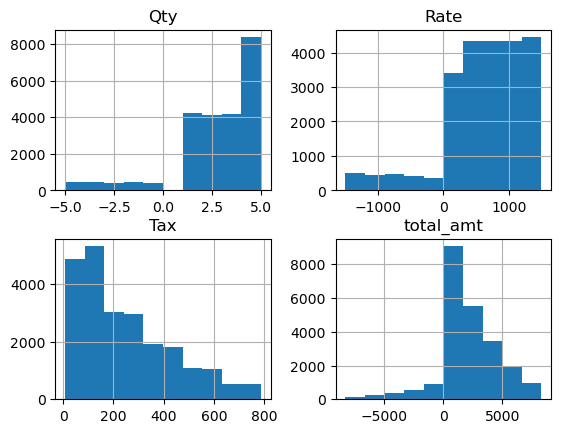

In [12]:
Customer_Final.loc[:,cont_var].hist()
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


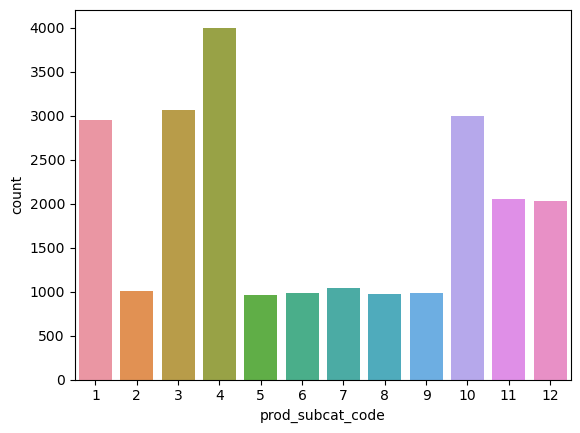

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


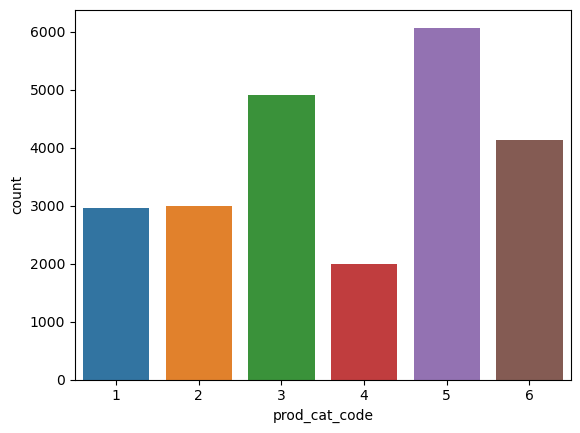

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


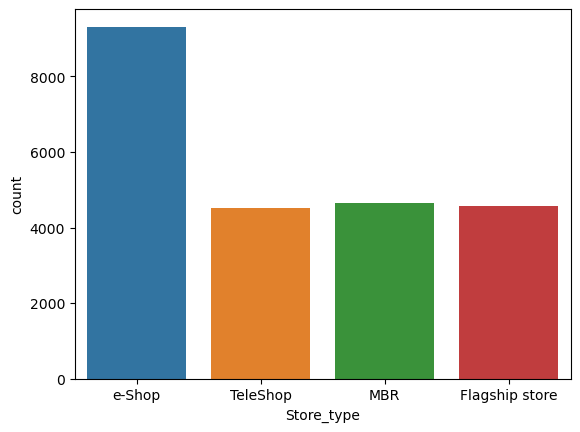

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


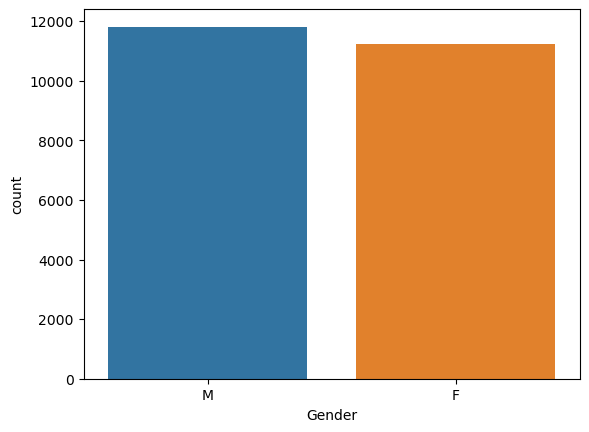

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


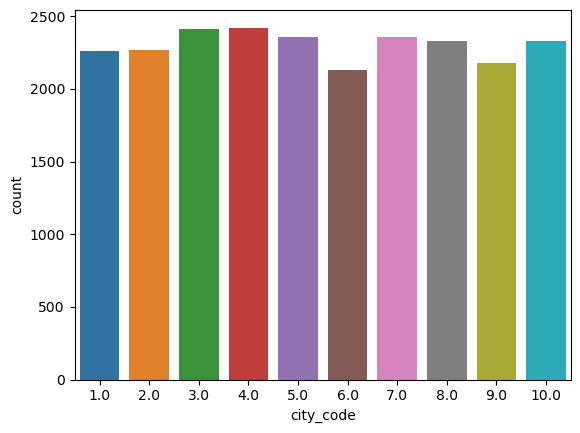

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


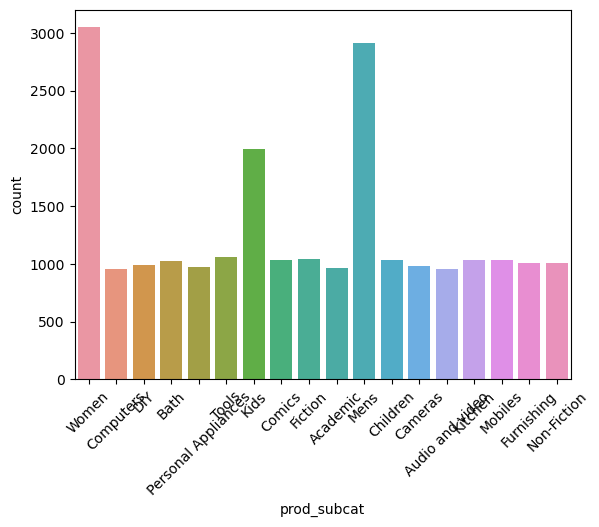

In [13]:
sns.countplot(Customer_Final.prod_subcat_code)
plt.show()

sns.countplot(Customer_Final.prod_cat_code)
plt.show()

sns.countplot(Customer_Final.Store_type)
plt.show()

sns.countplot(Customer_Final.Gender)
plt.show()

sns.countplot(Customer_Final.city_code)
plt.show()

sns.countplot(Customer_Final.prod_subcat)
plt.xticks(rotation = 45)
plt.show()

# Not plotting for transaction_id, cust_id, tran_date and DOB as these will not be any useful insight

### 4. Calculate the following information using the merged dataset :


#### a. Time period of the available transaction data


In [14]:
A = Customer_Final
A['tran_date'] = A['tran_date'].apply(lambda x: x.replace('/', '-'))
A['TD'] = A.tran_date.apply(lambda x: dt.datetime.strptime(x,"%d-%m-%Y"))
print(' The period of data is from :', A.TD.min(), ' to :', A.TD.max() , '| Total days data :', A.TD.max() - A.TD.min())


 The period of data is from : 2011-01-25 00:00:00  to : 2014-02-28 00:00:00 | Total days data : 1130 days 00:00:00


#### b. Count of transactions where the total amount of transaction was negative


In [16]:
B = Customer_Final
B.loc[B['total_amt']<0, 'cust_id'].count()

2177

### 5. Analyze which product categories are more popular among females vs male customers.


In [57]:
C = Customer_Final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()
C.pivot(index="Gender",columns="prod_cat",values="Qty")

# As per the results, only Bags and Footwear are the 2 categories which have more female contribution vs male

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2362,7070,3425,5832,3716,4895
M,2346,7587,3748,6476,3555,5041


### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [106]:
D = Customer_Final.drop_duplicates(subset = ['cust_id'])
E = D.city_code.value_counts().sort_values(ascending = False).reset_index()

print('City code which has the maximum customers : ',E.iloc[0,0])

City code which has the maximum customers :  3.0


In [111]:
print('Percentage of customers from the city code which has the maximum customers : ', (E.iloc[0,1])/(E.city_code.sum())*100,'%')

Percentage of customers from the city code which has the maximum customers :  10.465116279069768 %


### 7. Which store type sells the maximum products by value and by quantity?


In [117]:
Customer_Final.groupby('Store_type')[['Qty']].sum().sort_values('Qty', ascending = False)
# e-shop sells the maximum products by quantity

,Qty
Store_type,
e-Shop,22763
MBR,11194
Flagship store,11133
TeleShop,10984


In [118]:
Customer_Final.groupby('Store_type')[['total_amt']].sum().sort_values('total_amt', ascending = False)
# e-shop sells the maximum products by value as well

,total_amt
Store_type,
e-Shop,1.982482e+07
Flagship store,9.715688e+06
MBR,9.674486e+06
TeleShop,9.364781e+06


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [210]:
A = Customer_Final.loc[Customer_Final['prod_cat'].isin(['Clothing', 'Electronics'])]
A.loc[A['Store_type'] == 'Flagship store', 'total_amt'].sum()

3409559.27

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?


In [211]:
B = Customer_Final.loc[Customer_Final['Gender'] == 'M']
B.loc[B['prod_cat'] == 'Electronics', 'total_amt'].sum()

5703109.424999999

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?


In [212]:
G = Customer_Final.loc[Customer_Final['total_amt'] > 0]
G = G.drop_duplicates(subset = 'transaction_id')
H = pd.DataFrame(G.cust_id.value_counts())
H.reset_index()
H.loc[H['cust_id']>10].count()

# There are 6 customers who have more than 10 unique transactions

cust_id    6
dtype: int64

### 11. For all customers aged between 25 - 35, find out:


#### a. What was the total amount spent for “Electronics” and “Books” product categories?


In [224]:
I = Customer_Final
I['DB'] = I.DOB.apply(lambda x: dt.datetime.strptime(x,"%d-%m-%Y"))
I['Age'] = (I.TD - I.DB)/365
I = I.loc[I['Age'] > '25 days' ]
I = I.loc[I['Age'] < '35 days' ]
I.loc[I['prod_cat'].isin(['Books', 'Electronics']), 'total_amt'].sum()

10100122.11

####  b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [225]:
# As data is only till 28th Feb 2014 no need to set the <= date
I = I[I['TD'] >= '2014-01-01' ]
I.total_amt.sum()

996649.225

# THE END